In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rice.csv")
df.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value
0,Chandigarh,CHANDIGARH,2002,Kharif,Rice,140,700,5.0
1,Chandigarh,CHANDIGARH,2003,Kharif,Rice,100,500,5.0
2,Chandigarh,CHANDIGARH,2004,Kharif,Rice,80,400,5.0
3,Chandigarh,CHANDIGARH,2005,Kharif,Rice,50,250,5.0
4,Chandigarh,CHANDIGARH,2006,Kharif,Rice,50,250,5.0


In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
test_features = test_set.drop("Production",axis=1)
test_features = test_features.drop("Value",axis=1)
test_features = test_features.drop("Season",axis=1)
test_features = test_features.drop("Crop",axis=1)
test_labels = test_set["Production"].copy()
test_features.head()
test_labels.head()

533    419343
139    149000
88     453000
841    111464
985     20655
Name: Production, dtype: int64

In [5]:
train_set.describe()

,Crop_Year,Area,Production,Value
count,876.000000,876.000000,8.760000e+02,876.000000
mean,2006.028539,64300.172374,1.616848e+05,2.125628
std,2.604674,68400.229512,2.211986e+05,0.904901
min,2002.000000,1.000000,0.000000e+00,0.000000
25%,2004.000000,8517.500000,1.272500e+04,1.528507
50%,2006.000000,37833.500000,8.147450e+04,2.049523
75%,2008.000000,107214.000000,2.550400e+05,2.507861
max,2010.000000,400000.000000,1.710000e+06,5.150000


In [6]:
rice = train_set.copy()

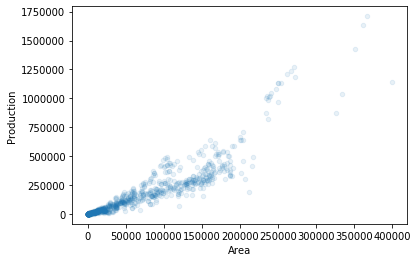

In [7]:
rice.plot(kind = "scatter",x= "Area",y = "Production",alpha =0.1)

In [8]:
corr_matrix = rice.corr()
corr_matrix

,Crop_Year,Area,Production,Value
Crop_Year,1.000000,0.009863,0.030279,0.118443
Area,0.009863,1.000000,0.911393,0.404475
Production,0.030279,0.911393,1.000000,0.585717
Value,0.118443,0.404475,0.585717,1.000000


In [9]:
rice_features = rice.drop("Production",axis=1)
rice_features = rice_features.drop("Value",axis=1)
rice_features = rice_features.drop("Season",axis=1)
rice_features = rice_features.drop("Crop",axis=1)
rice_labels = train_set["Production"].copy()
rice_features.head()

,State_Name,ind_district,Crop_Year,Area
6,Chandigarh,CHANDIGARH,2008,20
575,Uttar Pradesh,BAREILLY,2005,159862
821,Uttar Pradesh,MAINPURI,2007,75962
1063,Uttarakhand,RUDRA PRAYAG,2006,8876
905,Uttar Pradesh,RAE BARELI,2010,80776


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
rice_cat = rice_features["State_Name"]
rice_cat_encoded = encoder.fit_transform(rice_cat)
test_cat = test_features["State_Name"]
test_cat_encoded = encoder.fit_transform(test_cat)

In [11]:
rice_features = rice_features.drop("State_Name",axis = 1)
rice_features["State_Name"] = rice_cat_encoded
rice_features.head()
test_features = test_features.drop("State_Name",axis = 1)
test_features["State_Name"] = test_cat_encoded
test_features.head()

,ind_district,Crop_Year,Area,State_Name
533,AZAMGARH,2008,213081,5
139,SONIPAT,2003,65954,1
88,KURUKSHETRA,2009,117969,1
841,MAU,2009,76241,5
985,ALMORA,2009,21069,6


In [12]:
rice_cat = rice_features["ind_district"]
rice_cat_encoded = encoder.fit_transform(rice_cat)

test_cat = test_features["ind_district"]
test_cat_encoded = encoder.fit_transform(test_cat)


In [13]:
rice_features = rice_features.drop("ind_district",axis = 1)
rice_features["ind_district"] = rice_cat_encoded
rice_features.head()
test_features = test_features.drop("ind_district",axis = 1)
test_features["ind_district"] = test_cat_encoded
test_features.head()


,Crop_Year,Area,State_Name,ind_district
533,2008,213081,5,8
139,2003,65954,1,97
88,2009,117969,1,63
841,2009,76241,5,70
985,2009,21069,6,4


In [27]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(rice_features, rice_labels)
test_produ = reg.predict(test_features)

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,rice_features , rice_labels,
scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([96508.16918442, 84134.0347682 , 74594.22362714, 91398.38013724,
       80788.44243534])

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,test_features , test_labels,
scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([118790.19143764,  76651.53712528,  65757.30770992,  98381.43872889,
       107218.16124487])